<a href="https://colab.research.google.com/github/gastan81/unsupervised-ml/blob/main/1_introduction_to_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to K means

K-means clustering is an unsupervised machine learning algorithm that groups unlabeled data into a predefined number of clusters. It is one of the most popular clustering algorithms due to its simplicity and effectiveness.


![K-means](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)


## 1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ID of the Google Sheet for student food preferences
sheet_id = "1gYXqOBLEYIr99YmKGq2nIvK3CJmoWzsvwfwR9adfo2w"

# Title of the Google Sheet
sheet_name = "18136796"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Create a Pandas DataFrame from the CSV data
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop age - we only care about food here (we'll use age when we learn to scale data)
# Drop favorite_color - why can't we use a color to calculate distances
to_drop = ['age', 'favorite_color']
foods_df = foods_df.drop(columns=to_drop)

## 2.&nbsp; Explore the data 👩‍🚀

In [3]:
foods_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Alexandra,10,10,10,10,10,7,6,10,0
Andrea,10,10,1,1,10,9,10,4,2
Daniel,10,10,10,0,3,10,10,10,10
Josef,3,3,9,9,5,5,8,10,7
Kaj,3,10,7,8,8,10,8,10,9
Katherine,5,0,9,5,10,8,10,5,8
Leslie,7,3,3,5,3,7,7,5,1
Merry,8,5,0,0,2,9,8,0,4
Perry,8,0,5,0,0,8,4,0,0


What kind of foods do you all like the most?

In [4]:
# Calculate the average score for each column
average_scores = foods_df.mean()

# Sort the columns by their average scores in descending order
sorted_columns = average_scores.sort_values(ascending=False)

# Select the top 3 columns from the sorted DataFrame
top_3_columns = sorted_columns[:3]

# Print the top 3 columns
top_3_columns

peas        8.000000
olives      7.833333
broccoli    6.750000
dtype: float64

Which 3 foods do you all like the least?

In [ ]:
# Select the lowest 3 columns from the sorted DataFrame
lowest_3_columns = sorted_columns[-3:]

# Print the top 3 columns
lowest_3_columns

brussels_sprouts    4.916667
whisky              4.416667
oysters (raw)       3.166667
dtype: float64

If you want to explore the data further, look for:

- Strong positive or negative correlations between particular foods.
- Foods with a significantly larger or smaller standard deviation than others.
- Students who are consistently high or low scorers.

These differences in the data show that real-world data can be tricky. Large distances can arise due to differences in our data collection and the data itself. One approach to help deal with this problem is scaling, which we'll discuss in the next notebook.

---
## 3.&nbsp; Clustering in 2 dimensions ➡️

Two dimensions are chosen for visualisation purposes, as clustering results can be effectively plotted on a graph to understand how data points are grouped. While the core K-Means algorithm works for any number of dimensions, visualizing high-dimensional clusters becomes impossible. We will explore the two-dimensional case to gain a foundational understanding before tackling clustering in datasets with more features.

First, we create a small copy of our original dataframe with only 2 dimensions.

> Dataframe columns are called dimensions, features, and sometimes just columns. It's helpful to be comfortable with these interchangeable terms.

In [9]:
two_features_df = foods_df.iloc[:, :2].copy()
two_features_df

,broccoli,brussels_sprouts
student,,
Alexandra,10,10
Andrea,10,10
Daniel,10,10
Josef,3,3
Kaj,3,10
Katherine,5,0
Leslie,7,3
Merry,8,5
Perry,8,0


Now we will `.fit()` the k-means model to our data.
> `.fit()` performs a lot of calculations and stores the data in the given variable. It does not change our original dataframe, but uses the data from it.

In [17]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_2d_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_2d_kmeans.fit(two_features_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

Now that we have fitted our model. We can explore the calculations it made, such as who ended up in which cluster.

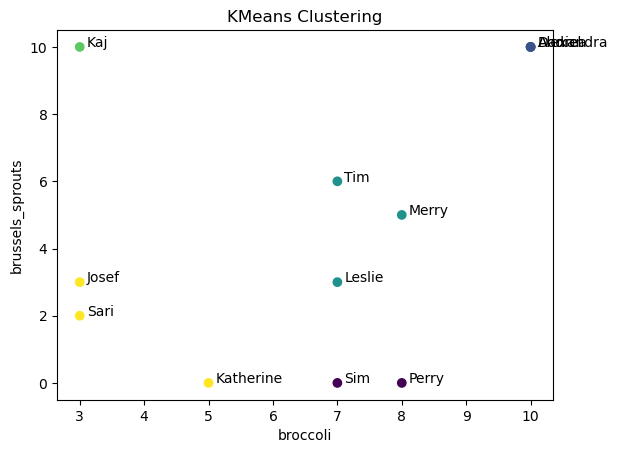

In [18]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in two_features_df.iterrows():
    plt.annotate(idx, (row["broccoli"], row["brussels_sprouts"]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

By including the cluster centers in the plot, we can gain a clearer understanding of the data distribution.
> The annotations are omitted here to avoid clutter

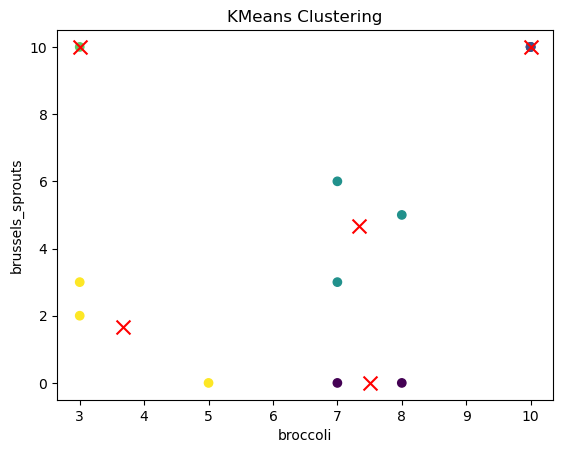

In [19]:
# @title Clusters and centroids

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Plot the cluster centers
plt.scatter(x = my_2d_kmeans.cluster_centers_[:, 0],
            y = my_2d_kmeans.cluster_centers_[:, 1],
            c = 'red',
            marker = 'x',
            s = 100)

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

If we label all the data points, our visualisation will become cluttered.  Therefore, we should explore this data in tabular form to see who was seated next to whom at lunch, based on their preferences for broccoli and Brussels sprouts.

In [24]:
# obtain the cluster output
table = my_2d_kmeans.labels_

# attach the cluster output to our original DataFrame
two_features_df["table"] = table

two_features_df.sort_values(by="table")

,broccoli,brussels_sprouts,table
student,,,
Perry,8,0,0
Sim,7,0,0
Alexandra,10,10,1
Andrea,10,10,1
Daniel,10,10,1
Leslie,7,3,2
Merry,8,5,2
Tim,7,6,2
Kaj,3,10,3


---
## 4.&nbsp; How does k-means find the centroids ❌

K-means clustering is an iterative algorithm that tries to partition a dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The algorithm minimises the distance between data points within a cluster and maximises the distance between data points in different clusters.

Steps:

1. Specify the number of clusters, K.
2. Select K points at random to act as the centroids of the clusters.
3. Assign each data point to the closest centroid.
4. Compute new centroids for each cluster by moving the centroid to the center of the data points assigned to that cluster.
5. Repeat steps 3 and 4 until the centroids no longer change.

[This website](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) is great for showing how k-means clusters and re-clusters. Please take a look and play around.

---
## 5.&nbsp; Clustering in multiple dimensions 🔀

Having explored K-Means clustering in two dimensions for visual clarity, let's now tackle the more general scenario: high-dimensional data. Here, the intuitive plotting techniques used in two dimensions become impractical.

In [47]:
# initialize the model
my_full_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

# fit the model to the data
my_full_kmeans.fit(foods_df)

# obtain the cluster output
table = my_full_kmeans.labels_

# attach the cluster output to our original DataFrame
foods_df["table"] = table

foods_df.sort_values(by="table")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,table
student,,,,,,,,,,
Leslie,7,3,3,5,3,7,7,5,1,0
Merry,8,5,0,0,2,9,8,0,4,0
Perry,8,0,5,0,0,8,4,0,0,0
Sim,7,0,0,0,3,5,7,0,2,0
Alexandra,10,10,10,10,10,7,6,10,0,1
Josef,3,3,9,9,5,5,8,10,7,1
Kaj,3,10,7,8,8,10,8,10,9,1
Katherine,5,0,9,5,10,8,10,5,8,2
Sari,3,2,0,0,7,10,6,6,7,2


Who's table have you ended up at? Look at the food ratings, why do you think that is?

---
## 6.&nbsp; Challenge: apply this to the spotify dataset 😃

### 6.1.&nbsp; Explore the 10 songs dataset

Import the 10 songs dataset into a new notebook and explore it like we did at the beginning of this notebook. Do you agree with the liveliness scores that certain songs have been given? Do you think the top 3 most danceable songs are the most danceable songs in the list? Ask questions of the data and see where it leads you.

If you're not familiar with any of the songs, look them up on YouTube or Spotify and listen to at least 30 seconds of each song to get a feel for them. Even if you're not a music expert we can all tell the difference between gangster rap and classical, right? Look at the scores given and see if they make sense with **how these songs make you feel**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_id = "1Ew-XfZn4DvNYi8blXabu_8QmPGS5r3-z" # milos
file_path = 'https://drive.google.com/uc?export=download&id='+file_id
file_path


'https://drive.google.com/uc?export=download&id=1Ew-XfZn4DvNYi8blXabu_8QmPGS5r3-z'

In [57]:
# ID of the Google Sheet for student food preferences
file_id = "1Ew-XfZn4DvNYi8blXabu_8QmPGS5r3-z" # milos

# URL to download the CSV
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Create a Pandas DataFrame from the CSV data
songs10_df = pd.read_csv(url,
                       index_col="id                     ")
songs10_df.columns = songs10_df.columns.str.strip()

# Drop song_name, artist and html - we only care about numerical data
songs10_names_df = songs10_df[['song_name', 'artist', 'html']]
to_drop = ['song_name', 'artist', 'html', 'danceability', 'energy', 'valence', 'duration_ms', 'time_signature']
songs10_df = songs10_df.drop(columns=to_drop)
songs10_df

,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo
id,,,,,,,,
4XHQyvbrBsQaaBUW1VvmsL,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,120.014
3yfqSUWxFvZELEM4PmlwIR,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,104.504
1y7OxO5i6sfrHXAmUM77YG,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,143.418
3898C4AbdbptwYet6547e5,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,129.318
63T7DJ1AFDD6Bn8VzG6JE8,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,158.691
6cr6UDpkjEaMQ80OjWqEBQ,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,148.174
4F8OK7mNa51mKqgHqWQiYm,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,131.997
2vfSCFvMbpf4hwxt22Wx7b,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,128.009
59cPOVxrn3Yjwydl1pullI,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,61.541


### 6.2 Explore the dataset in dimensions
Change the code above in the section `Clustering in 2 dimensions` and re-cluster the data using different columns. Explore what happens with different pairs of columns. Why do people change tables? How different does the data look each time?

### 6.3.&nbsp; Use KMeans to group the 10 songs dataset

Play around with the clustering algorithm and get familiar with it. What happens when you change the number of clusters? What number of clusters produces the best output? What happens when you change the number of the random seed?

In [58]:
two_features_df = songs10_df.iloc[:, :2].copy()
two_features_df

,key,loudness
id,,
4XHQyvbrBsQaaBUW1VvmsL,1,-3.383
3yfqSUWxFvZELEM4PmlwIR,5,-4.244
1y7OxO5i6sfrHXAmUM77YG,3,-15.503
3898C4AbdbptwYet6547e5,8,-16.790
63T7DJ1AFDD6Bn8VzG6JE8,1,-9.267
6cr6UDpkjEaMQ80OjWqEBQ,5,-10.023
4F8OK7mNa51mKqgHqWQiYm,4,-10.865
2vfSCFvMbpf4hwxt22Wx7b,1,-12.017
59cPOVxrn3Yjwydl1pullI,3,-33.503


In [59]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_2d_kmeans = KMeans(n_clusters = 3,
)#random_state = random_seed)

# 3. fit the model to the data
my_2d_kmeans.fit(two_features_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3)

In [60]:
two_features_df.columns

Index(['key', 'loudness'], dtype='object')

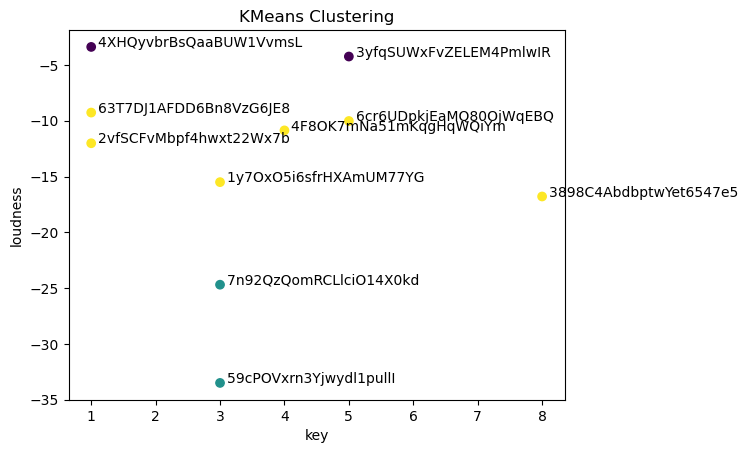

In [61]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in two_features_df.iterrows():
    plt.annotate(idx, (row[two_features_df.columns[0]], row[two_features_df.columns[1]]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

In [62]:
# obtain the cluster output
cluster = my_2d_kmeans.labels_

# attach the cluster output to our original DataFrame
two_features_df["cluster"] = cluster

two_features_df.sort_values(by="cluster").join(songs10_names_df).drop(columns=['html'])

,key,loudness,cluster,song_name,artist
id,,,,,
4XHQyvbrBsQaaBUW1VvmsL,1,-3.383,0,My Band ...,D12
3yfqSUWxFvZELEM4PmlwIR,5,-4.244,0,The Real Slim Shady ...,Eminem
59cPOVxrn3Yjwydl1pullI,3,-33.503,1,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms
7n92QzQomRCLlciO14X0kd,3,-24.698,1,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin
1y7OxO5i6sfrHXAmUM77YG,3,-15.503,2,Águas De Março ...,Antônio Carlos Jobim
3898C4AbdbptwYet6547e5,8,-16.790,2,The Girl From Ipanema ...,Stan Getz
63T7DJ1AFDD6Bn8VzG6JE8,1,-9.267,2,"Paint It, Black ...",The Rolling Stones
6cr6UDpkjEaMQ80OjWqEBQ,5,-10.023,2,Sultans Of Swing ...,Dire Straits
4F8OK7mNa51mKqgHqWQiYm,4,-10.865,2,Space Raiders - Charlotte de Witte Remix ...,Eats Everything


In [63]:
# initialize the model
my_full_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

# fit the model to the data
my_full_kmeans.fit(songs10_df)

# obtain the cluster output
cluster = my_full_kmeans.labels_

# attach the cluster output to our original DataFrame
songs10_df["cluster"] = cluster

songs10_df.sort_values(by="cluster").join(songs10_names_df).drop(columns=['html'])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,cluster,song_name,artist
id,,,,,,,,,,,
4XHQyvbrBsQaaBUW1VvmsL,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,120.014,0,My Band ...,D12
3898C4AbdbptwYet6547e5,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,129.318,0,The Girl From Ipanema ...,Stan Getz
4F8OK7mNa51mKqgHqWQiYm,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,131.997,0,Space Raiders - Charlotte de Witte Remix ...,Eats Everything
2vfSCFvMbpf4hwxt22Wx7b,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,128.009,0,In Silence ...,Amelie Lens
59cPOVxrn3Yjwydl1pullI,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,61.541,1,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms
7n92QzQomRCLlciO14X0kd,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,61.494,1,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin
63T7DJ1AFDD6Bn8VzG6JE8,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,158.691,2,"Paint It, Black ...",The Rolling Stones
3yfqSUWxFvZELEM4PmlwIR,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,104.504,3,The Real Slim Shady ...,Eminem
1y7OxO5i6sfrHXAmUM77YG,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,143.418,4,Águas De Março ...,Antônio Carlos Jobim


In [64]:
from ydata_profiling import ProfileReport as pr
import matplotlib

In [65]:
pr(songs10_df.drop(columns='cluster'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 6.4.&nbsp; Familiarise yourself with the documentation for scikit-learn

We'll be using scikit-learn a lot in the coming weeks, so it's a good idea to start familiarising yourself with its documentation now. The documentation is very well written, so be sure to check it out, start with the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) function that we used in this notebook. Play around with it and read up on some of the parameters that we didn't use.

### 6.5. [Optional bonus] See if you can learn to plot in 3 dimensions
Matplotlib allows you to visualise your data in 3D. Get creative and explore how to create a 3D scatter plot using different combinations of three columns from the food DataFrame. Once you have your data, experiment with clustering and assigning distinct colours to each cluster.

Compare the resulting clusters to those obtained using a 2D scatter plot. Does adding a third dimension significantly alter how the data points group together?

For an even more immersive experience, consider using Plotly, a Python library that enables interactive 3D scatter plots. Hovering your mouse over a data point in these plots reveals valuable information, such as the row index and cluster number.

In [72]:
# 0. data
three_features_df = songs10_df.iloc[:, :3].copy()

# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_3d_kmeans = KMeans(n_clusters = 3, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_3d_kmeans.fit(three_features_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3, random_state=123)

In [73]:
import plotly.graph_objects as go

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=three_features_df.iloc[:, 0],  # X-axis
    y=three_features_df.iloc[:, 1],  # Y-axis
    z=three_features_df.iloc[:, 2],  # Z-axis
    mode='markers',  # Show data points as markers
    marker=dict(
        color=my_3d_kmeans.labels_,  # Color by KMeans labels
        colorscale='Viridis',  # Use the 'Viridis' color scale
        size=5,  # Marker size
        opacity=0.8  # Marker opacity
    )
)])

# Annotate the data points with their index or a label
fig = go.Figure(data=[go.Scatter3d(
    x=three_features_df.iloc[:, 0],  # X-axis
    y=three_features_df.iloc[:, 1],  # Y-axis
    z=three_features_df.iloc[:, 2],  # Z-axis
    mode='markers+text',  # Show markers and text labels
    text=three_features_df.index.astype(str),  # Use index (or another label column) for annotations
    marker=dict(
        color=my_3d_kmeans.labels_,  # Color by KMeans labels
        colorscale='Viridis',  # Use the 'Viridis' color scale
        size=5,  # Marker size
        opacity=0.8  # Marker opacity
    ),
    textposition='top center',  # Position the text above the markers
)])

# Update layout with axis labels and title
fig.update_layout(
    title='KMeans Clustering in 3D',
    scene=dict(
        xaxis_title=three_features_df.columns[0],  # Label for X-axis
        yaxis_title=three_features_df.columns[1],  # Label for Y-axis
        zaxis_title=three_features_df.columns[2]   # Label for Z-axis
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust the margins as needed
)

# Show the plot
fig.show()
